
# Diseño de software
----

## Unidad 3: Debugging + Testing

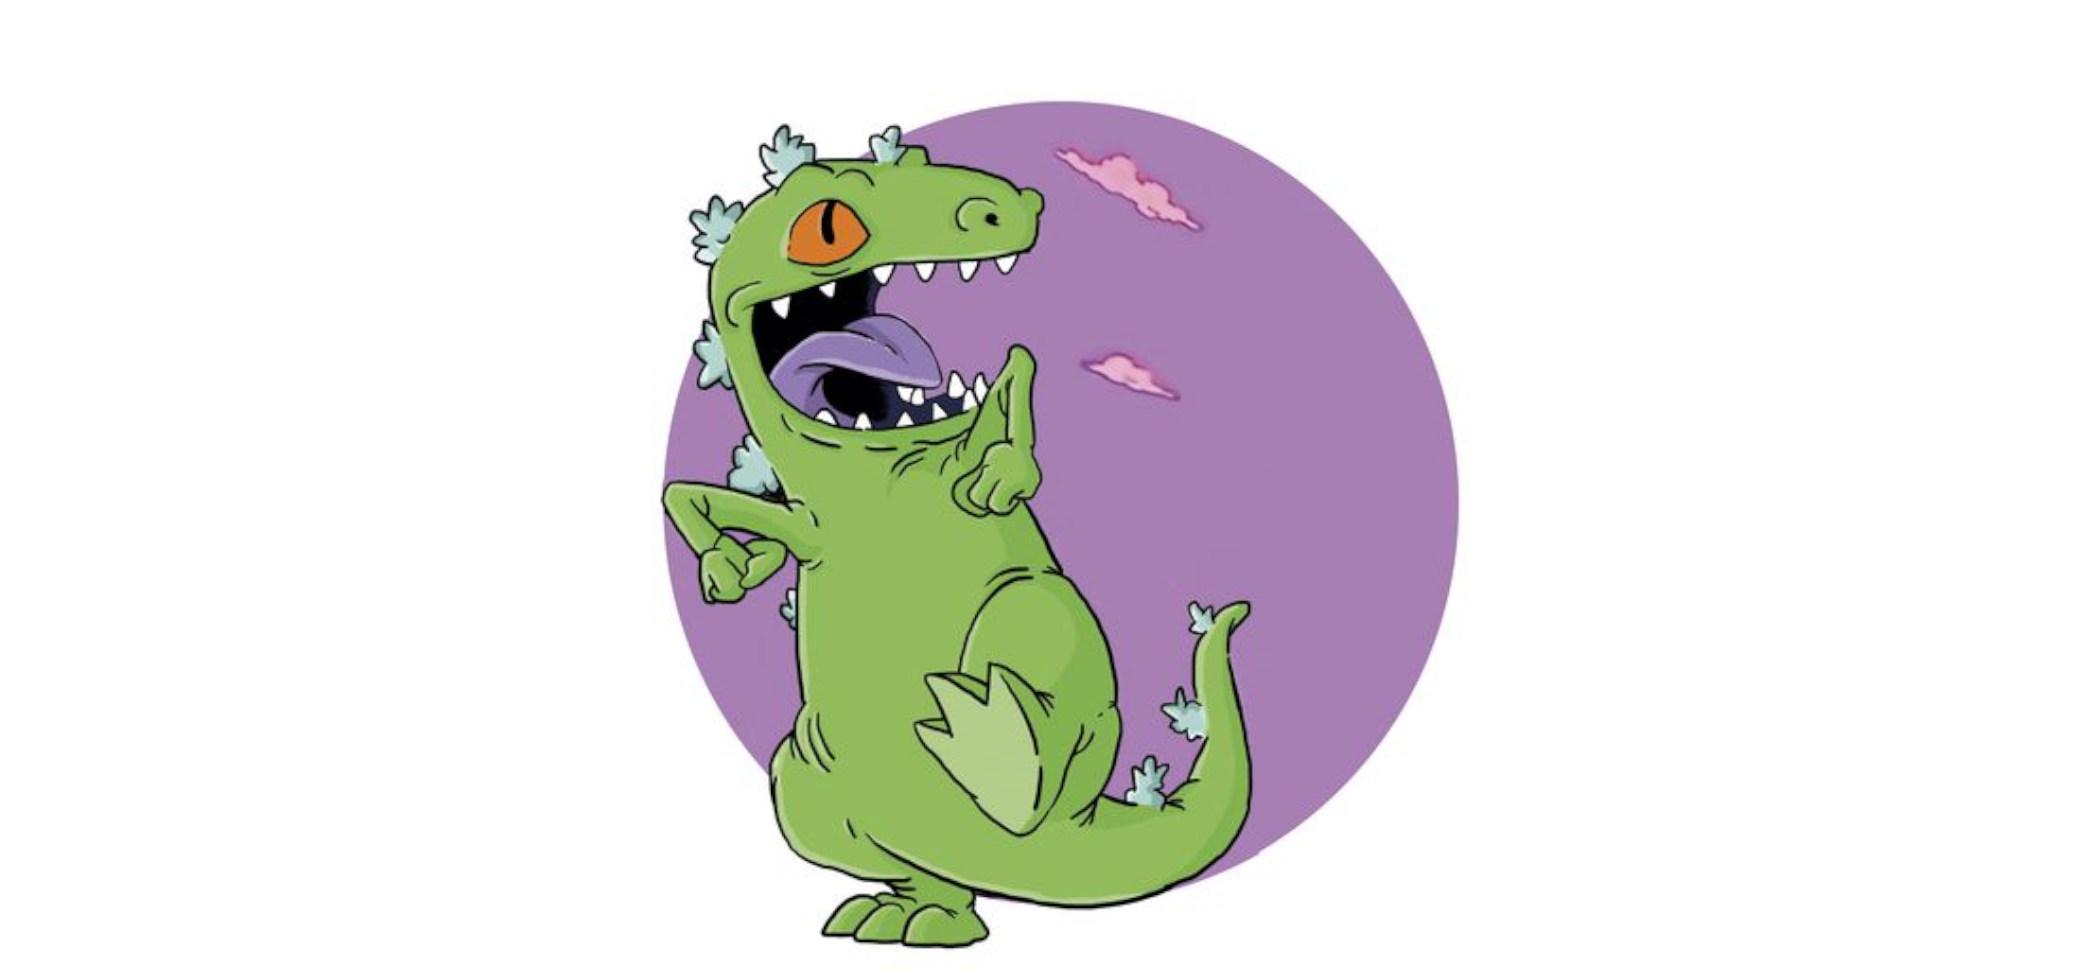

## Introducción al Debugging

El debugging es un proceso esencial en el desarrollo de software que consiste en identificar y corregir errores o bugs en un programa. 


- Permite encontrar y solucionar problemas en el código.
- Aumenta la calidad y confiabilidad del software.
- Facilita el desarrollo y mantenimiento de aplicaciones.

## Estrategias de Debugging

1. **Identificar el problema:** Reproducir el error y entender su causa.
2. **Revisar el código:** Inspeccionar el código en busca de posibles errores.
3. **Utilizar herramientas:** Depuradores, breakpoints, y más.
4. **Experimentar:** Probar soluciones y evaluar su efectividad.

## Qué es un Debugger?

Un debugger es una herramienta esencial en el desarrollo de software que permite a los programadores:

- **Analizar el código:** Inspeccionar el código fuente línea por línea.
- **Detener la ejecución:** Pausar la ejecución del programa en puntos específicos.
- **Observar variables:** Examinar el valor de las variables en tiempo real.
- **Rastrear errores:** Identificar y solucionar problemas en el código.


## Funciones Principales de un debugger

Un debugger típicamente ofrece estas funciones clave:

- **Breakpoints:** Puntos de interrupción para detener la ejecución.
- **Step Into, Step Over:** Control de la ejecución línea por línea.
- **Watchlist:** Seguimiento de variables y expresiones.
- **Stack Trace:** Visualización de la pila de llamadas.

## Debuggers en Python

Los dos principales debugers en python son

- **pdb (Python Debugger):** Pdb es el módulo de depuración incorporado en Python. Permite establecer puntos de interrupción (breakpoints), examinar el estado de las variables, avanzar línea por línea en el código y ejecutar comandos interactivos para depurar problemas. Puedes utilizarlo tanto desde la línea de comandos como dentro de un script Python.
- **ipdb:** Es una versión mejorada de `pdb` que ofrece algunas características adicionales, como coloreado de sintaxis y una mejor experiencia de usuario en la línea de comandos. Puedes instalarlo como una biblioteca adicional. (**Vemos este**)

## Ejemplo de uso de IPDB

```python
def dividir(x, y):
    resultado = x / y
    return resultado

import ipdb; ipdb.set_trace()  # de usa este patron y despues se 
                               # bloquea git para que no se commitee
resultado = dividir(10, 2)
print("El resultado es:", resultado)
```


## Ejemplo de uso de IPDB - Frente a una exception

```python
def dividir(x, y):
    resultado = x / y
    return resultado

import ipdb
with ipdb.launch_ipdb_on_exception(): # si el contexto lanza una 
    resultado = dividir(10, 2)
    print("El resultado es:", resultado)
    
```


## Ejemplo de uso de IPDB - Si falla un callable

```python

import ipdb

# si al llamar la exception falla estro frena
# donde ocurrio la exception
@ipdb.iex     
def dividir(x, y):
    resultado = x / y
    return resultado

resultado = dividir(10, 2)
print("El resultado es:", resultado)
```


## IPDB (IPython  Debugger)

Funcionalidades Adicionales respecto a pdb

- Coloreado de Sintaxis: ipdb ofrece un coloreado de sintaxis mejorado.
- Historial de Comandos: Puedes ver y repetir comandos anteriores con las teclas de flecha.
- Autocompletado: Pulsa la tecla Tab para autocompletar comandos y nombres de variables.



## Comandos Básicos de ipdb

- `help`: Muestra todos los comandos.
- `n` o `next`: Ejecuta la próxima línea de código.
- `c` o `continue`: Continúa la ejecución hasta el próximo breakpoint.
- `q` o `quit`: Sale de ipdb y finaliza el programa.
- `p variable`: Imprime el valor de una variable.
- `l` o `list`: Muestra el código circundante.
- `up`: Sube a la llamada de función superior.
- `until línea`: Ejecuta el código hasta una línea específica.
- `s` o `step`: Entra en la función actual (si es una llamada a función) o avanza a la siguiente línea (si es una línea de código normal).


Vamos con un demo...

## Pytest

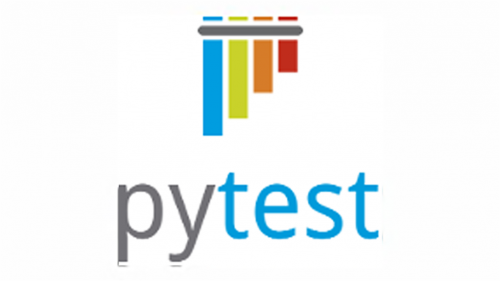

In [ ]:
!pip install pytest

## Pytest Básico

In [ ]:
# content of test_sample.py
def inc(x):
    return x + 1


def test_answer():
    assert inc(3) == 5

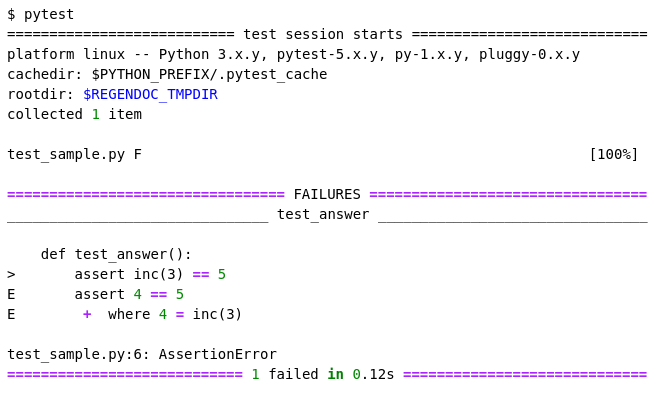

## Esperando errores

In [ ]:
# content of test_typeerror.py
import pytest

def sum(a, b):
    if not isinstance(a, (float, int)):
        raise TypeError('Error de tipo')
        
    return a + b

def test_mytest():
    assert sum(1,2) == 3
    with pytest.raises(TypeError):
        sum("1", 2)

## Test Case

Se pueden agrupar test en lo que se llama `TestCase` que es una clase que empieza con el nombre `Test*`.

No se suele usar mucho.

In [ ]:
class TestClass:
    
    def test_one(self):
        x = "this"  
        assert 'h' in x

    def test_two(self):
         x = "hello"
        assert hasattr(x, 'check')
        

## Como correr tests

- py.test tests/test_mod.py
- py.test tests/
- py.test -k match **# def test_match():**
- py.test -x **# stop on first failure case**
- py.test --maxfail=2 **# on the second**
- py.test -s **# enable `print` output**
- py.test --durations=10 **# list top10 slowest cases**



## Qué es lo que se testea?

- folder, file.	
- recursive	
- test_xxx.py, xxx_test.py	
- TestClass (without __init__ method)	
- all the function or method with prefix `test_`


## Fixtures

In [ ]:
import numpy as np

import pytest


@pytest.fixture
def normal():
    return np.random.normal(10, 2, 100)


def test_mean(normal):
    assert normal.mean() == 10

def test_std(  normal):
    assert normal.std() == 2

## Fixtures

In [1]:
import numpy as np

import pytest


@pytest.fixture
def normal():
    return np.random.normal(10, 2, 100)


def test_mean(self, normal):
    np.testing.assert_almost_equal(normal.mean(), 10., 0)

def test_std(self, normal):
    np.testing.assert_almost_equal(normal.std(), 2., 0)

## Fixtures

Podes hacer que un fixture exista exclusivamente para una *TestCase*

In [ ]:
import numpy as np

import pytest

class TestCaseNormal:

    @pytest.fixture
    def normal(self):
        return np.random.normal(10, 2, 100)

    def test_mean(self, normal):
        np.testing.assert_almost_equal(normal.mean(), 10., 0)

    def test_std(self, normal):
        np.testing.assert_almost_equal(normal.std(), 2., 0)

## Markers

- `Skip`: Para tests que no se deben ejecutar (Da como resultado `SKIP` o `s`).
- `SkipIf`: Para los que no *sirven* en ciertas condiciones (`SKIP` o `s`) .
- `xfail`: Para test que por algun motivo *se sabe* que estan fallando. 
  Dos resultados posibles:
  - `XFAIL` o `x` para cuando efectivamente falla.
  - `XPASS` o `X` cuando aunque deberia fallar, funciona.

In [ ]:
@pytest.mark.skip(reason="no way of currently testing this")
def test_the_unknown():
    ...

## Markers

- `Skip`: Para tests que no se deben ejecutar (Da como resultado `SKIP` o `s`).
- `SkipIf`: Para los que no *sirven* en ciertas condiciones (`SKIP` o `s`) .
- `xfail`: Para test que por algun motivo *se sabe* que estan fallando. 
  Dos resultados posibles:
  - `XFAIL` o `x` para cuando efectivamente falla.
  - `XPASS` o `X` cuando aunque deberia fallar, funciona.

In [ ]:
import sys

@pytest.mark.skipif(sys.version_info < (3, 6), reason="requires python3.6 or higher")
def test_function():
    ...

In [ ]:
@pytest.mark.skipif(sys.platform == "win32", reason="does not run on windows")
class TestPosixCalls:
    def test_function(self):
        "will not be setup or run under 'win32' platform"

## Markers

- `Skip`: Para tests que no se deben ejecutar (Da como resultado `SKIP` o `s`).
- `SkipIf`: Para los que no *sirven* en ciertas condiciones (`SKIP` o `s`) .
- `xfail`: Para test que por algun motivo *se sabe* que estan fallando. 
  Dos resultados posibles:
  - `XFAIL` o `x` para cuando efectivamente falla.
  - `XPASS` o `X` cuando aunque deberia fallar, funciona.

In [ ]:
@pytest.mark.xfail
def test_function():
    ...

## Tratando random.

- Siempre inicialicen `np.random.default_rng(<SEED>)`
- Fijen la semilla **por test**

Lo siguiente *NO* se hace, y "puede" fallar.

In [4]:
import numpy as np

random = np.random.default_rng(42) # pueden no pasarle nada

def test_0():
    assert random.normal(size=1_000_000).mean() == 9.750249789376471e-05
    
def test_1():
    assert random.normal(10_000_00).mean() == 1.0004826432403187

## Tratando random.

- Siempre inicialicen `np.random.default_rng(<SEED>)`
- Fijen la semilla **por test**

Lo siguiente si se hace y ya no falla

In [ ]:
import numpy as np

def test_0():
    random = np.random.default_rng(42)
    assert np.allclose(random.normal(size=10_000_00).mean(), 0)
    
def test_1():
    random = np.random.default_rng(42)
    assert np.allclose(random.normal(10_000_00).mean(), 0)

## Tratando random.

- Siempre inicialicen `np.random.default_rng(<SEED>)`
- Fijen la semilla **por test**

Lo siguiente si se hace y ya no falla, con fixtures

In [ ]:
import numpy as np

@pytest.fixture(scope="session")
def normal():
    
    def _make(seed=None, *args, **kwargs):
        random = np.random.default_rng(42)
        return random.normal(*args, **kwargs)
    
    return _make
    
def test_0(normal):
    assert np.allclose(normal(size=10_000_00).mean(), 0)
    
def test_1(normal):
    assert np.allclose(normal(10_000_00).mean(), 0)


## Test parametrizados

Se pueden hacer muchos tests con una sola funcion

In [ ]:
@pytest.mark.parametrize("funcion, res", [(str.lower, "auto"), (str.upper, "AUTO")])
def test(funcion, res):
    assert funcion("aUto") == res